<a href="https://colab.research.google.com/github/MX-FOR/Minimum-of-a-fuction-with-Data-and-Machine-Learning/blob/main/Minimum_of_a_fuction_with_Data_and_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# De datos en .csv a función con variables dinámicas

Importo mis paquetes necesarios

In [60]:
import numpy as np 
import pandas as pd

from scipy.optimize import curve_fit,minimize #from scipy.optimize import minimize 
import matplotlib.pyplot as plt


Tengo que definir una funcion objetivo (Conozco el comportamiendo de mis datos)

In [61]:
def objetive (x,a,b,c) : 
  return a*x + b*x**2 + c #De manera general defino mi funcion como cuadratica 

Vamos a importar mis datos  

In [62]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/longley.csv'
#df = pd.read_csv('data.csv')

dataframe = pd.read_csv(url , header = None)

data = dataframe.values


Escojo un rango de mi funcion objetivo y aplico que mis variables dinamicas coincidan con mis datos

In [63]:
x, y = data[:, 5], data[:, -5]

popt, _ = curve_fit(objective, x, y)


a, b, c = popt


Mi funcion quedaria de la siguiente manera

In [64]:
print('y = %.3f * x + %.3f * x**2 + %.3f' % (a, b, c))

y = -5085.213 * x + 1.304 * x**2 + 4956998.436


Graficando mi funcion y datos 

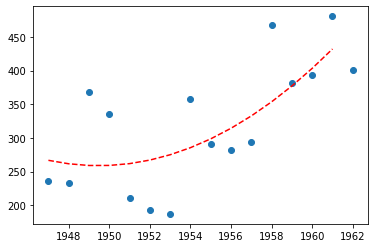

In [65]:
plt.scatter(x, y)
# Definimos la secuencia  de in - out puts entre sus limites 
x_line = arange(min(x), max(x), 1)
y_line = objective(x_line, a, b, c)
# Mapping function
plt.plot(x_line, y_line, '--', color='red')
plt.show()

# Minimo de mi función usando Nelder-Mead Optimization

Graficamos nuestra función con un rango determinado 

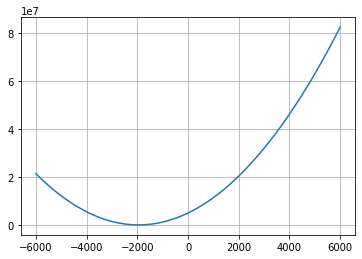

In [68]:
def func(x):
    x = 5085.213 * x + 1.304 * x**2 + 4956998.436
    return x
 
x = np.arange(-6000, 6000, 2)
y = func(x)

plt.plot(x, y)
plt.grid()
plt.show()

Aplicamos el algoritmo 

In [69]:
x0 = -1
result = minimize(func, x0, method="nelder-mead")
print(result) 

 final_simplex: (array([[-1949.8515625 ],
       [-1949.85166016]]), array([-706.94271338, -706.94271338]))
           fun: -706.9427133789286
       message: 'Optimization terminated successfully.'
          nfev: 76
           nit: 38
        status: 0
       success: True
             x: array([-1949.8515625])


Graficamos con nuestro minimo absoluto

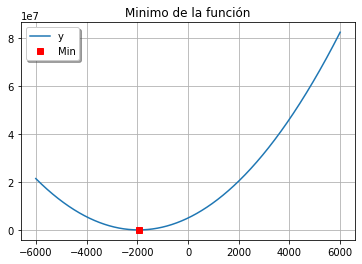

In [73]:
plt.title("Minimo de la función")
plt.plot(x, y, label="y")
plt.plot(result['x'], result['fun'], 'sr', label="Min")
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid()
plt.show()

# Scipy.optimize ejemplo  (Para funciones de varias variables) 

In [74]:
import math
import random
import sys

def function(x, y):
    exp = (math.pow(x, 2) + math.pow(y, 2)) * -1
    return math.exp(exp) * math.cos(x * y) * math.sin(x * y)

max_func = - sys.maxsize - 1
min_func = sys.maxsize
maximal_x, maximal_y = None, None
minimal_x, minimal_y = None, None

for i in range(1000000):
    randx = random.random()*2 - 1
    randy = random.random()*2 - 1
    result = function(randx, randy)
    max_func = max(max_func, result)
    if max_func == result:
        maximal_x, maximal_y = randx, randy
    min_func = min(min_func, result)
    if min_func == result:
        minimal_x, minimal_y = randx, randy

print ("Maximal (x, y):", (maximal_x, maximal_y))
print ("Max func value:", max_func, '\n')
print ("Minimal (x, y):", (minimal_x, minimal_y))
print("Min func value:", min_func)

Maximal (x, y): (-0.62643216838678, -0.6267788199080893)
Max func value: 0.16119844890503862 

Minimal (x, y): (-0.6265856421821006, 0.6266241150691021)
Min func value: -0.1611984679750025


In [75]:
from scipy.optimize import minimize_scalar

def f(x):
  #return (-0.012*x**2 + 3.254*x -155)
  #3.254 * x + -0.012 * x^2 + -155.028
  return (x - 2) * x * (x + 2)**2


res = minimize_scalar(f)

res.x


#res = minimize_scalar(f, bounds=(-3, -1), method='bounded')
#res.x

1.2807764040333458